In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve



In [75]:
url='https://raw.githubusercontent.com/digipodium/Datasets/main/regression/diamond_pricing.csv'
df=pd.read_csv(url)
df.head

<bound method NDFrame.head of      Paleonium  Pressure        Price
0           17      6567  2810.280298
1           59      5253  1986.967089
2          123      9715  2083.132087
3          182      2073  2236.340285
4          133      6400  1903.323339
..         ...       ...          ...
995         90     15039  1633.608018
996         49     10592  2316.189728
997         42     18435  1189.359047
998         10     13675  2922.682785
999         54     16996  1469.549379

[1000 rows x 3 columns]>

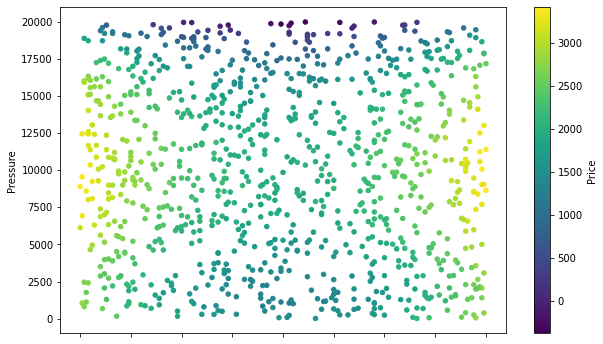

In [76]:
df.plot(kind='scatter',
    x='Paleonium',y='Pressure',c='Price',cmap='viridis',figsize=(10,6))
plt.show()

<AxesSubplot:>

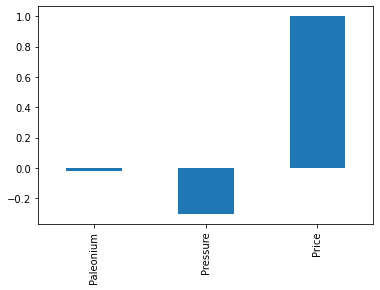

In [77]:
df.corrwith(df['Price']).plot(kind='bar')

In [78]:
X=df.drop('Price',axis=1).values
y=df['Price'].values

In [79]:
xtrain, xtest, ytrain, ytest= train_test_split(X,y,test_size=.25,random_state=0)

In [80]:
model=make_pipeline(StandardScaler(), DecisionTreeRegressor())

In [81]:
model.fit(xtrain,ytrain)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [82]:
print('Testing Metrics')
ypred=model.predict(xtest)
print(F'Score : {r2_score(ytest,ypred):.4}')
print(F'MSE : {mean_squared_error(ytest,ypred):.4}')
print(F'MSE : {mean_absolute_error(ytest,ypred):.4}')

Testing Metrics
Score : 0.9573
MSE : 1.812e+04
MSE : 101.7


In [83]:
print('Testing Metrics')
ypred=model.predict(xtest)
print(F'Score : {r2_score(ytest,ypred):.4}')
print(F'MSE : {mean_squared_error(ytest,ypred):.4}')
print(F'MSE : {mean_absolute_error(ytest,ypred):.4}')

Testing Metrics
Score : 0.9573
MSE : 1.812e+04
MSE : 101.7


In [84]:
print('Training Metrics')
ypred=model.predict(xtrain)
print(F'Score : {r2_score(ytrain,ypred):.4}')
print(F'MSE : {mean_squared_error(ytrain,ypred):.4}')
print(F'MSE : {mean_absolute_error(ytrain,ypred):.4}')

Training Metrics
Score : 1.0
MSE : 0.0
MSE : 0.0


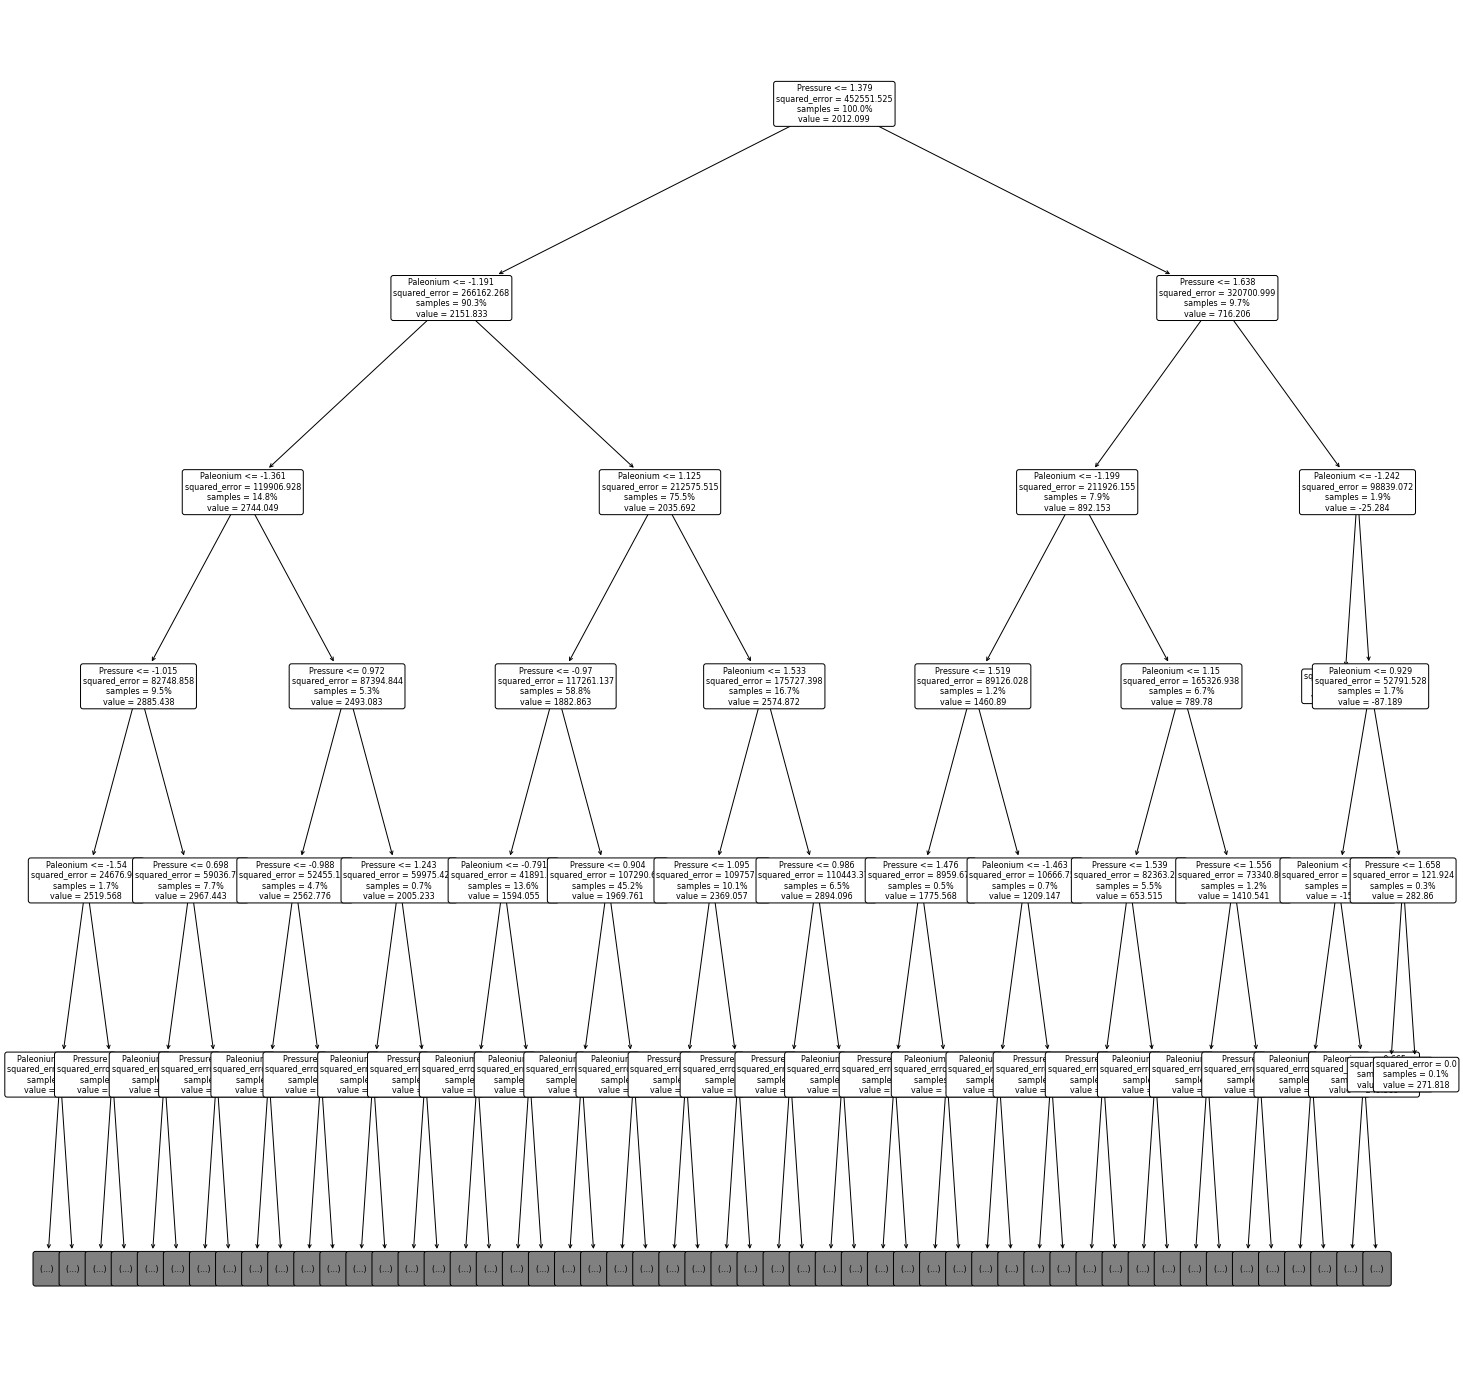

In [85]:
plt.figure(figsize=(25,25))
plot_tree(model.get_params()['decisiontreeregressor'],
    max_depth=5,
    feature_names=['Paleonium','Pressure'],
    fontsize=8,proportion=True,rounded=True)
plt.show()

# CRoss Validate
    Avg Model accuracy

In [86]:
ss=ShuffleSplit(n_splits=50,test_size=.25)
model=make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=15))


In [87]:
result=cross_validate(model,X,y,cv=ss,
    scoring=['neg_mean_absolute_error','r2'],
    return_train_score=True,
    return_estimator=True)
result=pd.DataFrame(result)
result['test_error']=-result['test_neg_mean_absolute_error']
result['train_error']=-result['train_neg_mean_absolute_error']
result

,fit_time,score_time,estimator,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2,test_error,train_error
0,0.000000,0.000000,"(StandardScaler(), DecisionTreeRegressor(max_d...",-102.342611,-5.394961,0.959895,0.999400,102.342611,5.394961
1,0.005892,0.000000,"(StandardScaler(), DecisionTreeRegressor(max_d...",-106.067500,-6.202488,0.958632,0.999181,106.067500,6.202488
2,0.000000,0.003999,"(StandardScaler(), DecisionTreeRegressor(max_d...",-102.575708,-5.635054,0.958256,0.999282,102.575708,5.635054
3,0.003999,0.000000,"(StandardScaler(), DecisionTreeRegressor(max_d...",-106.902131,-8.247447,0.959226,0.998950,106.902131,8.247447
4,0.000000,0.004097,"(StandardScaler(), DecisionTreeRegressor(max_d...",-93.813191,-7.979815,0.963882,0.998922,93.813191,7.979815
5,0.000000,0.000000,"(StandardScaler(), DecisionTreeRegressor(max_d...",-98.550154,-5.137373,0.962872,0.999291,98.550154,5.137373
6,0.008024,0.000000,"(StandardScaler(), DecisionTreeRegressor(max_d...",-94.099367,-7.581750,0.966805,0.999029,94.099367,7.581750
7,0.000000,0.000000,"(StandardScaler(), DecisionTreeRegressor(max_d...",-100.578911,-6.820297,0.962061,0.998987,100.578911,6.820297
8,0.000000,0.000000,"(StandardScaler(), DecisionTreeRegressor(max_d...",-96.270592,-5.532088,0.959091,0.999359,96.270592,5.532088
9,0.000000,0.000000,"(StandardScaler(), DecisionTreeRegressor(max_d...",-104.101667,-6.614067,0.954146,0.999121,104.101667,6.614067


<AxesSubplot:>

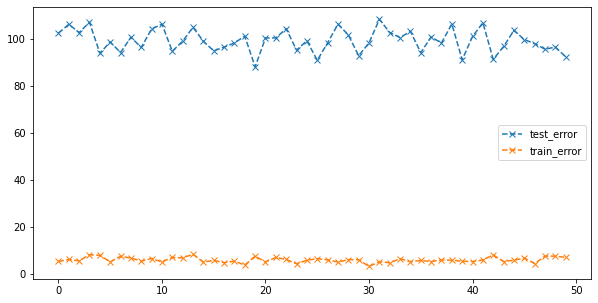

In [88]:
fig, ax=plt.subplots(figsize=(10,5))
result.plot(kind='line',y='test_error',ax=ax,style='--x')
result.plot(kind='line',y='train_error',ax=ax,style='--x')

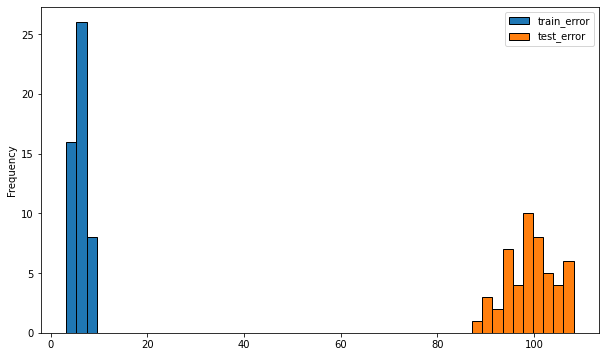

In [91]:
fig, ax=plt.subplots(figsize=(10,5))
result[['train_error','test_error']].plot(kind='hist',bins=50,ax=ax,edgecolor='black')
plt.show()


In [92]:
max_depth_options=[5,10,15,25,50,100]
train_scores, test_scores= validation_curve(model,X,y,
                param_name='decisiontreeregressor__max_depth',
                param_range=max_depth_options,
                cv=ss,
                scoring='neg_mean_absolute_error',
                n_jobs=2)
train_errors,test_errors=-train_scores,-test_scores

In [93]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=15))])

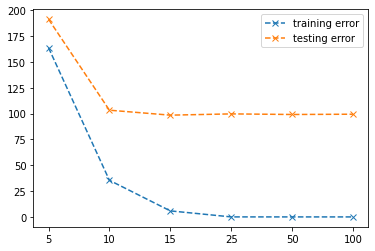

In [95]:
plt.plot(train_errors.mean(axis=1),'--x', label='training error',)
plt.plot(test_errors.mean(axis=1),'--x', label='testing error')
plt.xticks([0,1,2,3,4,5],max_depth_options)
plt.legend()
plt.show()